# Методы численного интегрирования 

In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad

# Исходные параметры 

In [2]:
# Пределы интегрирования
start_int = 1 
end_int = 6

n = 1000 # количество прямоугольников

h = (end_int - start_int) / n # ширина прямоугольника

# Интеграл

In [3]:
def integral(x):
    return ((x**2)*(np.exp(x)))/((x+2)**2)

# Решения интеграла 

In [4]:
def ret():
    return quad(integral, start_int, end_int)[0] 
ret()

202.62049068918728

График 

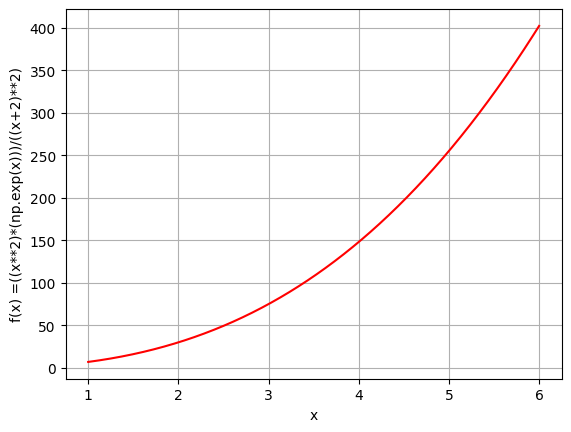

In [5]:
x1 = np.linspace(start_int, end_int, n)
y = x1**3 + 5*(x1**2) + x1
plt.plot(x1, y, color = 'red')
plt.xlabel('x')
plt.ylabel('f(x) =((x**2)*(np.exp(x)))/((x+2)**2)')
plt.grid(True)
plt.show()

# Метод левых прямоугольников 

In [6]:
def left_rectandles():
    print("Метод левых прямоугольников",end="\n")
    
    total = sum([integral((start_int + (k*h))) for k in range(0, n)])
    
    result = h * total
    
    print(f"Результат: {result}\n")
    
    return result

In [7]:
left_rectandles()

Метод левых прямоугольников
Результат: 202.05443472364072



202.05443472364072

# Метод правых прямоугольников 

In [8]:
def right_rectandles():
    print("Метод правых прямоугольников",end="\n")
   
    total = sum([integral((start_int+h + (k*h))) for k in range(0, n)])
    
    result = h * total
    
    print(f"Результат: {result}\n")
    
    return result

In [9]:
right_rectandles()

Метод правых прямоугольников
Результат: 203.18756804876767



203.18756804876767

# Метод трапеции

In [10]:
def trapezoid():
    print("Метод трапеции",end="\n")

    sum_ = 0.5 * (integral(start_int)+integral(end_int))
    
    total = sum([integral((start_int + k*h)) for k in range(0, n)])
    
    result = h * (total+sum_)
    print(f"Результат: {result}\n")
    return result

In [11]:
trapezoid()

Метод трапеции
Результат: 202.62251154277558



202.62251154277558

# Метод Монте-Карло

In [12]:
def monte_carlo():
    print("Метод Монте Карло ",end="\n") 
    
    total = 0
    
    for i in range(1, n):
        rangom_num = start_int + random.random() * (end_int-start_int)
    
        intes = integral(rangom_num)   
        
        total += h * intes
        
    print(f"Результат: {total}\n")
    
    return total 


In [13]:
monte_carlo()

Метод Монте Карло 
Результат: 198.15626610950756



198.15626610950756

# Метод Симпсона

In [14]:
def simpsons():
    print("Метод Симпсона ", end="\n")

    temp = 0.0
    # для нечетных
    x = start_int + h
    for i in range(1, int(n / 2 + 1)):
        temp += 4 * integral(x)
        x += 2 * h

    # для четных
    x = start_int + 2 * h
    for i in range(1, int(n / 2)):
        temp += 2 * integral(x)
        x += 2 * h

    total = (h / 3) * (integral(start_int) + integral(end_int) + temp)
    
    print(f"Результат: {total}\n")
    
    return total

In [15]:
simpsons()

Метод Симпсона 
Результат: 202.62049069011604



202.62049069011604

# Расчет погрешности 

In [16]:
def pog():
    
    ist = ret()
    
    mas = []
    
    left = left_rectandles() - ist
    mas.append(left)
    
    right = right_rectandles() - ist
    mas.append(right)
    
    trap = trapezoid() - ist 
    mas.append(trap)
    
    monte = monte_carlo() - ist
    mas.append(monte)
    
    simpson_ = simpsons() - ist 
    mas.append(simpson_)
    
    print()
    print(f"Погрешность метод левых прямоугольников {left}\n")
    print(f"Погрешность метод правых прямоугольников {right}\n")
    print(f"Погрешность метод трапеции {trap}\n")
    print(f"Погрешность метод монте-карло {monte}\n")
    print(f"Погрешность метод симпсона {simpson_}\n")
    
    index = 0
    min_ = abs(mas[index])
    for i in range(len(mas)):
        if abs(mas[i]) <= min_ :
            min_ = abs(mas[i])
            index = i
            print("d",min_,i)
    
    print("Лучший Метод:")
    if index == 0:
        print("метод левых прямоугольников")
    elif index == 1:
        print("метод правых прямоугольников")
    elif index == 2:
        print("метод трапеции")
    elif index == 3:    
        print("метод монте-карло")
    elif index == 4:
        print("симпсона")
       

In [17]:
pog()

Метод левых прямоугольников
Результат: 202.05443472364072

Метод правых прямоугольников
Результат: 203.18756804876767

Метод трапеции
Результат: 202.62251154277558

Метод Монте Карло 
Результат: 205.03405828985575

Метод Симпсона 
Результат: 202.62049069011604


Погрешность метод левых прямоугольников -0.5660559655465534

Погрешность метод правых прямоугольников 0.5670773595803951

Погрешность метод трапеции 0.0020208535883057266

Погрешность метод монте-карло 2.413567600668472

Погрешность метод симпсона 9.287646207667422e-10

d 0.5660559655465534 0
d 0.0020208535883057266 2
d 9.287646207667422e-10 4
Лучший Метод:
симпсона
